In [119]:
# Ejercicios de ML
import numpy as np

In [120]:
a = np.array([1,3,5,8])
b = np.array([2,6,1,2])
a + b

array([ 3,  9,  6, 10])

In [121]:
np.sum(a)

17

In [122]:
import pandas as pd

df = pd.read_csv('datos01_train.csv')

# Separar las variables (X) de las etiquetas (y)
X = df[['Variable1', 'Variable2']]
y = df['Clase']

In [123]:
df

,Variable1,Variable2,Clase
0,0.967030,0.547232,1.0
1,0.972684,0.714816,1.0
2,0.697729,0.216089,0.0
3,0.976274,0.006230,0.0
4,0.252982,0.434792,0.0
5,0.779383,0.197685,0.0
6,0.862993,0.983401,1.0
7,0.163842,0.597334,0.0
8,0.008986,0.386571,0.0
9,0.044160,0.956653,1.0


In [124]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [125]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5)) # crear una figura
plt.scatter(df['Variable1'], # eje x
            df['Variable2'], # eje y
            c=df['Clase'], # utilizamos las clases para colorear
            s=100) # aumentar tamaño por defecto)
plt.title('datos01_train', family='monospace') # título
plt.xlabel('Variable1') # eje x
plt.ylabel('Variable2') # eje y
plt.show()

In [126]:
import numpy as np

def distancia_euclidea(x, y):
    return np.sqrt(np.sum((x - y)**2))

In [127]:
# Dos puntos de ejemplo
punto_a = np.array([0.4, 0.5, 0.1, 0.3, 0.5])
punto_b = np.array([0.8, 0.7, 0.2, 0.8, 0.2])
print("La distancia Euclídea entre A y B es", distancia_euclidea(punto_a, punto_b))

In [128]:
# Dos puntos de ejemplo
punto_a = np.array([0.4, 0.5])
punto_b = np.array([0.8, 0.7])
print("La distancia Euclídea entre A y B es", distancia_euclidea(punto_a, punto_b))

In [129]:
def visualizar_distancia(punto_a, punto_b, ver_radio = False):
    
    # Pintar los dos puntos
    plt.scatter(*punto_a, c='red', marker='o', label='A')
    plt.scatter(*punto_b, c='blue', marker='o', label='B')

    # Dibujar una línea entre los puntos
    plt.plot([punto_a[0], punto_b[0]], [punto_a[1], punto_b[1]], linestyle='--', color='gray')

    # Calcular la distancia euclídea
    distance = distancia_euclidea(punto_a, punto_b)

    # Calcular el ángulo de rotación de la línea para escribir el texto
    angle = np.arctan2((punto_b[1] - punto_a[1]), (punto_b[0] - punto_a[0])) * (180 / np.pi) 

    # Calcular el centro de la línea para escribir el texto
    midpoint = [(punto_a[0] + punto_b[0]) / 2, (punto_a[1] + punto_b[1]) / 2] 

    # Escribir la distancia entre los dos puntos
    plt.text(midpoint[0], midpoint[1], f'Distancia: {distance:.2f}', ha='center', va='bottom', rotation=angle)

    if ver_radio:

        # Añadir círculos con la distancia euclídea
        circle = plt.Circle(punto_a, # centro
                            distance, # radio
                            fill=False, linestyle='dotted', edgecolor='red')
        plt.gca().add_patch(circle)
        circle = plt.Circle(punto_b, # centro
                            distance, # radio
                            fill=False, linestyle='dotted', edgecolor='blue')
        plt.gca().add_patch(circle)

    plt.title('Distancia euclídea')
    plt.xlabel('Variable1')
    plt.ylabel('Variable2')
    
    plt.xlim(0,1) # rango eje x
    plt.ylim(0,1) # rango eje y
    
    # Hacer los ejes en la misma magnitud
    plt.gca().set_aspect('equal', adjustable='box')
    
    # Sacar la leyenda de la caja principal
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

visualizar_distancia(punto_a, punto_b)
visualizar_distancia(punto_a, punto_b, ver_radio = True)

In [130]:
def visualizar_vecinos(X_train, y_train, dato_nuevo, indices_vecinos, clase):

    # Mostrar conjunto de entrenamiento
    plt.scatter(X_train[:, 0], 
                X_train[:, 1],
                c=y_train, 
                edgecolors='k', marker='o', s=100, label='Training')

    # Resaltar los vecinos más cercanos del punto
    plt.scatter(X_train[indices_vecinos, 0], 
                X_train[indices_vecinos, 1], 
                facecolors='none', 
                edgecolors='red', # rodear en rojo
                linewidths=2, 
                s=100, 
                label='Vecinos más cercanos')

    # Mostrar el nuevo dato que queremos clasficar
    plt.scatter(dato_nuevo[0], 
                dato_nuevo[1], 
                c=clase, 
                vmin=0, vmax=1,
                marker='x', s=200, label='Test Point')

    plt.title('Vecinos más cercanos de {}'.format(np.round(dato_nuevo, 2)))
    plt.xlabel('Variable1')
    plt.ylabel('Variable2')
    
    plt.gca().set_aspect('equal', adjustable='box')

    plt.show()

In [131]:
# Counter proporciona un diccionario donde cada elemento distinto se almacena 
# como claves con un valor asociado igual a su cuenta
from collections import Counter

# Recibe un conjunto de datos de entrenamiento junto con sus etiquetas reales, el nuevo dato que queremos clasificar y el número de vecinos que seleccionamos para hacerlo
def clasificar_dato_usando_knn(X_train, y_train, dato_nuevo, k=3):

    # Obtener todas las distancias
    distances = [distancia_euclidea(dato_nuevo, x_train) for x_train in X_train]

    # Seleccionar los objetos k más cercanos
    k_indices = np.argsort(distances)[:k]

    # Asignar las etiquetas
    k_nearest_labels = [y_train[i] for i in k_indices]

    # Seleccionar la clase a la que se asigna, 
    # que es la etiqueta más común entre los vecinos más cercanos
    most_common = Counter(k_nearest_labels).most_common(1)

    # Visualizar la iteración
    visualizar_vecinos(X_train, y_train, dato_nuevo, k_indices, most_common[0][0])

    # Devolver la clase
    return most_common[0][0]

# Realizamos la clasificación para todos los datos del conjunto de test
def aplicar_kNN_datos_nuevos(X_test, X_train, y_train, k=3):
    
    # Crear un array inicialmente vacío para almacenar las classes en cada iteración
    predicted_labels = np.empty(X_test.shape[0], dtype=int)

    # Clasficar cada punto del conjunto de test
    for i, x_test in enumerate(X_test):
        predicted_labels[i] = clasificar_dato_usando_knn(X_train, y_train, x_test, k)

    # Almacenar para cada objeto la clase que se le ha asignado
    df = pd.DataFrame(X_test)
    df['pred_class'] = predicted_labels

    return df

In [132]:
# Cargar el conjunto de datos nuevos
df_test = pd.read_csv('datos01_test.csv')

# Separar las variables (X) de las etiquetas (y)
X_test = df_test[['Variable1', 'Variable2']]

In [133]:
df_test

In [134]:
plt.figure(figsize=(5, 5))

# Los datos del conjunto de entrenamiento
plt.scatter(df['Variable1'], 
            df['Variable2'], 
            c=df['Clase'], 
            s=100, 
            label='Training')

# Los datos que queremos clasificar
plt.scatter(df_test['Variable1'], 
            df_test['Variable2'], 
            color='red', 
            marker='x', # marcar como X en vez de puntos
            s=150, 
            label='Test')

plt.title('datos01_train + datos01_test', family='monospace')
plt.xlabel('Variable1') 
plt.ylabel('Variable2') 

# Incluir leyenda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [135]:
resultados_k3 = aplicar_kNN_datos_nuevos(X_test.values, X.values, y.values)
resultados_k3

In [136]:
!pip install scikit-learn

In [137]:
import sklearn

In [138]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciar un objeto modelo
modelo = KNeighborsClassifier(n_neighbors=3)
# Ajustar el modelo
modelo.fit(X, y)

In [139]:
# Clasificar los objetos nuevos
modelo.predict(X_test)

In [23]:
# Obtener las probabilidades de la clasificación
modelo.predict_proba(X_test)

array([[0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333]])

In [24]:
type(X_test)

pandas.core.frame.DataFrame

In [25]:
X_test

,Variable1,Variable2
0,0.017490,0.891573
1,0.284861,0.298976
2,0.792034,0.324471
3,0.864710,0.447513
4,0.548230,0.357172


In [26]:
resultados_k3['pred_class']

0    0
1    0
2    0
3    1
4    0
Name: pred_class, dtype: int64

In [27]:
print(type(modelo))

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>


In [28]:
modelo = KNeighborsClassifier() # creamos el objeto pero no entrenamos
modelo.predict(X_test)

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Instanciar un objeto modelo
modelo = KNeighborsClassifier(n_neighbors=3)
# Ajustar el modelo
modelo.fit(X, y)
# Ver los parámetros con los que lo hemos entrenado
modelo.get_params()

In [ ]:
y_test = pd.read_csv('datos01_test_etiquetas.csv')
y_test = y_test.values.ravel()
y_test

In [ ]:
# Pronosticar las etiquetas
y_pred = modelo.predict(X_test)
y_pred

In [ ]:
# Crear la figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Subplot para ver las clases reales
axes[0].scatter(df_test['Variable1'], 
                df_test['Variable2'], 
                c=y_test, 
                s=100)
axes[0].set_title('Reales')

# Subplot para ver las clases pronosticadas
# borde vacío de los puntos inicialmente
ec = np.array(['none'] * len(df_test)) 
# si es fallo poner borde rojo
ec[y_test != y_pred] = 'r' 
# Ver las predicciones
axes[1].scatter(df_test['Variable1'], 
                df_test['Variable2'], 
                c=y_pred, 
                s=100, 
                edgecolors=ec)
axes[1].set_title('Predicciones')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Matriz de confusión:\n', conf_matrix)

In [ ]:
# EJERCICIO: Entrena un modelo utilizando el conjunto de datos disponible en datos02_train.csv con k=3
# Visualiza los resultados y calcula el valor de la accuracy usando los datos almacenados en datos02_test.csv 
# y sus correspondientes etiquetas en datos02_test_etiquetas.csv. Después entrena otro modelo modificando la 
# métrica con la que se realiza el cómputo de la distancia. Prueba con la distancia Manhattan y analiza si has 
# obtenido los mismos resultados. Puedes consultar los parámetros neceesarios para cambiar la forma de medir la 
# similitud en la documentación.
df2 = pd.read_csv('datos02_train.csv')

# Separar las variables (X) de las etiquetas (y)
X2 = df2[['Variable1', 'Variable2']]
y2 = df2['Clase']

# Cargar el conjunto de datos nuevos
df2_test = pd.read_csv('datos02_test.csv')

# Separar las variables (X) de las etiquetas (y)
X2_test = df2_test[['Variable1', 'Variable2']]

In [ ]:
# Instanciar un objeto modelo
modelo = KNeighborsClassifier(n_neighbors=3)
# Ajustar el modelo
modelo.fit(X2, y2)
# Clasificar los objetos nuevos
modelo.predict(X2_test)

In [ ]:
# Obtener las probabilidades de la clasificación
modelo.predict_proba(X2_test)

In [ ]:
y2_test = pd.read_csv('datos02_test_etiquetas.csv')
y2_test = y2_test.values.ravel()

# Transformar las etiquetas a números
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y2_test = le.fit_transform(y2_test)

y2_test

In [ ]:
# Pronosticar las etiquetas
y2_pred = modelo.predict(X2_test)
y2_pred

In [ ]:
# Crear la figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Subplot para ver las clases reales
axes[0].scatter(df2_test['Variable1'], 
                df2_test['Variable2'], 
                c=y2_test, 
                s=100)
axes[0].set_title('Reales')

# Subplot para ver las clases pronosticadas
# borde vacío de los puntos inicialmente
ec = np.array(['none'] * len(df2_test)) 
# si es fallo poner borde rojo
ec[y2_test != y2_pred] = 'r' 
# Ver las predicciones
axes[1].scatter(df2_test['Variable1'], 
                df2_test['Variable2'], 
                c=y2_pred, 
                s=100, 
                edgecolors=ec)
axes[1].set_title('Predicciones')

plt.tight_layout()
plt.show()

In [ ]:
# Evaluar el modelo
accuracy = accuracy_score(y2_test, y2_pred)
conf_matrix = confusion_matrix(y2_test, y2_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Matriz de confusión:\n', conf_matrix)

In [ ]:
df_train = pd.read_csv('datos03_train.csv')

In [ ]:
df_train.info()

In [ ]:
df_train.describe()

In [ ]:
!pip install seaborn 

In [ ]:
import seaborn as sns

df_train['Clase'] = pd.Categorical(df_train['Clase'], categories=['c1', 'c2'])
sns.pairplot(df_train, # conjunto de datos
            hue='Clase', # variable para colorear
            height=1, # altura del gráfico
            aspect=1, # proporción (cuadrado)
            plot_kws={ # argumentos elementos del gráfico
                'alpha':0.3, # transparencia
                'edgecolor': 'none' # quitar bordes de los puntos
            })

plt.show()

In [ ]:
X_train = df_train.drop('Clase', axis = 1)
y_train = df_train['Clase'].values.ravel()

In [ ]:
# Entrenar el modelo
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(X_train, y_train)

In [ ]:
# Cargar los datos para evaluar el modelo
df_test = pd.read_csv('datos03_test.csv')
X_test = df_test.drop('Clase', axis = 1)
y_test = df_test[['Clase']].values.ravel()

In [ ]:
df_test['Clase'] = pd.Categorical(df_test['Clase'], categories=['c1', 'c2'])
sns.pairplot(df_test, hue='Clase', height=1.5, aspect=1, 
            plot_kws={'alpha':0.3, 'edgecolor': 'none'})
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'La accuracy es: {accuracy:.2f}')
print('Matriz de confusión:\n', conf_matrix)

In [ ]:
def entrenar_y_obtener_accuracy(X_train, y_train, X_test, y_test, k=3):
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f'La accuracy es: {accuracy:.2f}')
    print('Matriz de confusión:\n', conf_matrix)
    return modelo, y_pred

In [ ]:
modelo, y_pred = entrenar_y_obtener_accuracy(X_train, y_train, X_test, y_test)

In [ ]:
# Datos de entrenamiento
df_train = pd.read_csv('datos04_train.csv')
print(df_train.describe())
print(df_train.shape)
# Datos de evaluación
df_test = pd.read_csv('datos04_test.csv')
X_test = df_test.drop('Clase', axis = 1)
y_test = df_test[['Clase']].to_numpy().ravel()

In [ ]:
df_train['Clase'] = pd.Categorical(df_train['Clase'], categories=['c1', 'c2'])
sns.pairplot(df_train, hue='Clase', height=1.5, aspect=1, 
            plot_kws={'alpha':0.3, 'edgecolor': 'none'})
plt.show()

In [29]:
# Dividir el conjunto de datos en variables (X) y clase (y):
X_train = df_train.drop('Clase', axis = 1)
y_train = df_train[['Clase']].to_numpy().ravel()
# Entrenar el modelo
modelo, y_pred = entrenar_y_obtener_accuracy(X_train, y_train, X_test, y_test)

NameError: name 'df_train' is not defined

In [30]:
# Usando las variables que ya tenemos definidas
df_train = pd.read_csv('datos03_train.csv')
df_test = pd.read_csv('datos03_test.csv')

np.random.seed(29) # garantizar reproducibilidad

# Añadir 5 columnas con datos completamente aleatorios
for i in range(1, 6):
    column_name = f'new_variable_{i}'
    df_train[column_name] = np.random.randn(len(df_train)) 
    df_test[column_name] = np.random.randn(len(df_test))

df_train['Clase'] = pd.Categorical(df_train['Clase'], categories=['c1', 'c2'])
sns.pairplot(df_train, hue='Clase', height=1.5, aspect=1, plot_kws={'alpha':0.3, 'edgecolor': 'none'})
plt.show()

NameError: name 'sns' is not defined

In [31]:
# Creamos conjunto de training
X_train = df_train.drop('Clase', axis = 1).values
y_train = df_train[['Clase']].to_numpy().ravel()

# Creamos conjunto de test
X_test = df_test.drop('Clase', axis = 1).values
y_test = df_test[['Clase']].values

modelo, y_pred = entrenar_y_obtener_accuracy(X_train, y_train, X_test, y_test)

NameError: name 'entrenar_y_obtener_accuracy' is not defined

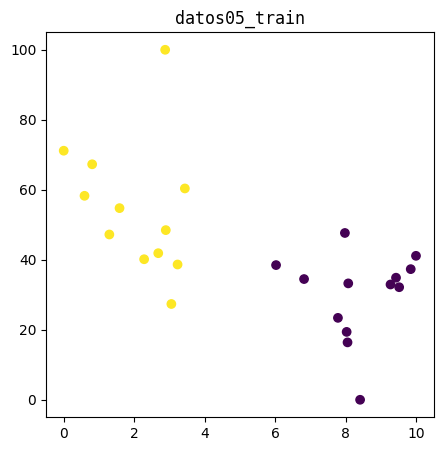

In [32]:
# Cargar los datos de entrenamiento
df_train = pd.read_csv('datos05_train.csv')
X_train = df_train[['Variable1', 'Variable2']]
y_train = df_train['Clase']

# Visualizar el conjunto de datos
plt.figure(figsize=(5, 5))
plt.scatter(df_train['Variable1'], df_train['Variable2'], c=df_train['Clase'])
plt.title('datos05_train', family='monospace')
plt.show()

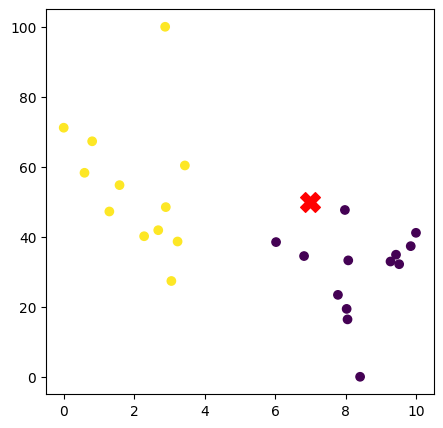

In [33]:
# El nuevo punto que queremos clasificar
# Creamos un conjunto de datos de una única fila
# También podríamos utilizar un array de numpy pero nos da un warning de que
# el modelo se ha entrenado con nombres de columnas y el objeto a pronosticar no tiene
new_point = pd.DataFrame([[7, 50]], columns=X_train.columns) 

plt.figure(figsize=(5, 5))
# El conjunto de datos
plt.scatter(X_train['Variable1'], 
            X_train['Variable2'], 
            c=y_train, label = 'datos05_train')
# El nuevo punto
plt.scatter(new_point['Variable1'],
            new_point['Variable2'], 
            c='red', marker='X', s=200, label='Nuevo')
plt.show()

In [34]:
# Entrenar el modelo
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(X_train, y_train)
# Clasificar el nuevo objeto
predicted_class = modelo.predict(new_point)
print("El punto es de clase:", predicted_class)

El punto es de clase: [1.]


[[21 16 17]]
    Variable1  Variable2
21   7.982266  47.658696
16   2.897759  48.476780
17   1.295575  47.225658


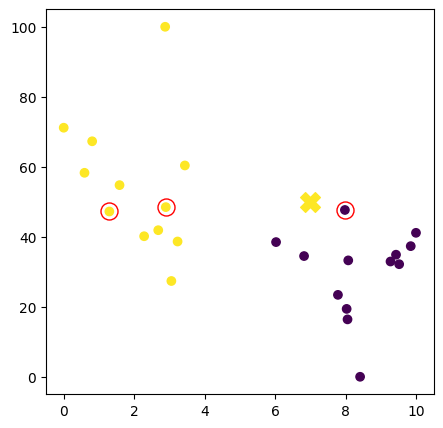

In [35]:
# Encontrar los índices de los objetos del conjunto de entrenamiento que son los vecinos más cercanos
indices = modelo.kneighbors(new_point, n_neighbors = 3, return_distance=False) 
print(indices)
print(X_train.iloc[indices[0]])


# Iniciar visualización 
plt.figure(figsize=(5, 5))

# Resaltar los vecinos más cercanos
plt.scatter(X_train.loc[indices[0], 'Variable1'], 
            X_train.loc[indices[0], 'Variable2'],  
            marker='o', s=150, label='Nearest Neighbors', 
            edgecolor = 'red', c = 'white')
# Visualizar el conjunto de datos
plt.scatter(df_train['Variable1'], 
            df_train['Variable2'], 
            c=df_train['Clase'], 
            label = 'datos05_train')
# Visualizar el nuevo punto
plt.scatter(new_point['Variable1'], 
            new_point['Variable2'], 
            c=predicted_class,  marker='X', 
            s=200, label='Nuevo', vmin=0, vmax=1)


plt.show()

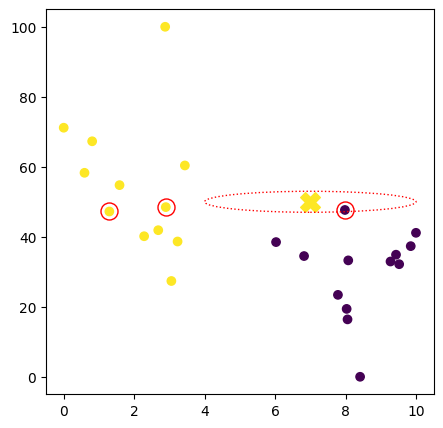

In [36]:
plt.figure(figsize=(5, 5))

# Resaltar los vecinos más cercanos
plt.scatter(X_train.loc[indices[0], 'Variable1'], 
            X_train.loc[indices[0], 'Variable2'],  
            marker='o', s=150, label='Nearest Neighbors', 
            edgecolor = 'red', c = 'white')
# Visualizar el conjunto de datos
plt.scatter(X_train['Variable1'], 
            X_train['Variable2'], 
            c=y_train, label = 'datos05_train')
# Visualizar el nuevo punto
plt.scatter(new_point['Variable1'], 
            new_point['Variable2'], c=predicted_class,  
            marker='X', s=200, label='Nuevo', vmin=0, vmax=1)
# Ver el área de los objetos a distancia 5
circle = plt.Circle(new_point.to_numpy().ravel(), 3, 
                    fill=False, linestyle='dotted', edgecolor='red')
plt.gca().add_patch(circle) 

plt.show()

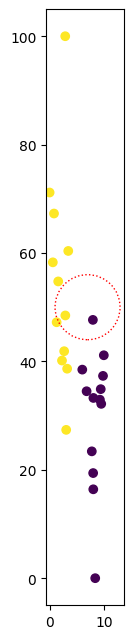

In [37]:
plt.figure(figsize=(1, 10))
plt.scatter(X_train['Variable1'], 
            X_train['Variable2'], 
            c=y_train,  marker='o')
circle = plt.Circle(new_point.to_numpy().ravel(), 6, fill=False, linestyle='dotted', edgecolor='red')
plt.gca().add_patch(circle) 
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

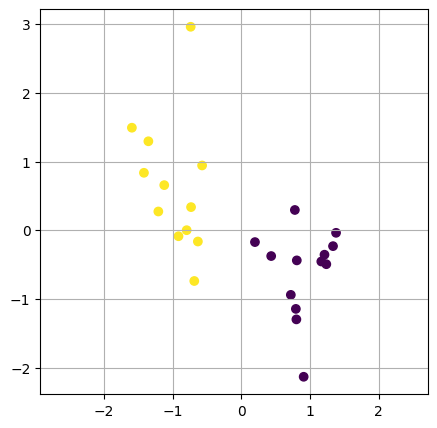

In [39]:
# Variables estandarizadas
plt.figure(figsize=(5, 5))
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=y_train, marker='o')
plt.axis('equal')
plt.grid(True)
plt.show()

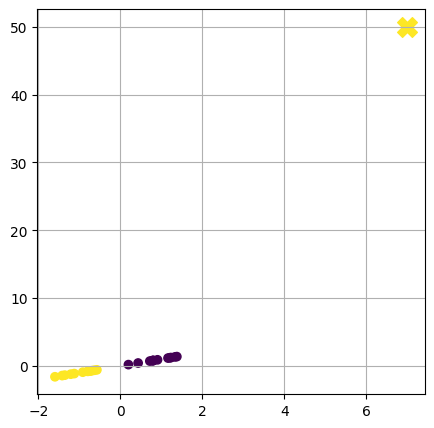

   Variable1  Variable2
0          7         50
   Variable1  Variable2
0          7         50


In [40]:
plt.figure(figsize=(5, 5))

# Resaltar los vecinos más cercanos

# Visualizar el conjunto de datos
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,0], 
            c=y_train, label = 'datos05_train')
# Visualizar el nuevo punto
plt.scatter(new_point['Variable1'], new_point['Variable2'], c=predicted_class,  marker='X', s=200, label='Nuevo', vmin=0, vmax=1)

plt.grid(True)
plt.show()
print(new_point)

In [41]:
X_test = new_point
X_test_scaled = scaler.transform(X_test)

In [42]:
plt.figure(figsize=(5, 5))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, marker='o')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c='red', marker='X', s=200) 
plt.axis('equal')
plt.grid(True)

In [43]:
plt.figure(figsize=(5, 5))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, marker='o')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c='red', marker='X', s=200, label='New Point (6, 60)') 
plt.axis('equal')
plt.grid(True)

circle = plt.Circle(X_test_scaled[0], 0.9, fill=False, linestyle='dotted', edgecolor='red')
plt.gca().add_patch(circle) 

In [44]:
modelo, y_pred = entrenar_y_obtener_accuracy(X_train, y_train, X_test, np.array([0]))
y_pred

In [45]:
modelo, y_pred = entrenar_y_obtener_accuracy(X_train_scaled, y_train, X_test_scaled, np.array([0]))
y_pred

In [46]:
# EJERCICIO: Carga los datos de datos05_test.csv y úsalos para evaluar el modelo. Compara cómo se comportaría 
# el modelo sin escalar con la versión buena del modelo escalado.

# Cargar los datos de entrenamiento y 
# Dividimos en variables (X) y clase (y)
df_test = pd.read_csv('datos05_test.csv')
df_train = pd.read_csv('datos05_train.csv')

# Dividimos en variables (X) y clase (y)
X_test = df_test[['Variable1', 'Variable2']]
y_test = df_test['Clase']

X_train = df_train[['Variable1', 'Variable2']]
y_train = df_train['Clase']

# Entrenar el modelo
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(X_train, y_train)

#Clasificamos el conjunto de test
predicted_class = modelo.predict(X_test)
print("El puntos de test son de clase:", predicted_class)

#Estandarizamos las variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Las representamos
plt.figure(figsize=(5, 5))
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=y_train, marker='o')     # añadir los datos de entrenamiento (o)
plt.scatter(X_test_scaled[:,0], X_test_scaled[:,1], c='red', marker='X', s=100) # añadir los datos de prueba (x)

for i in range(len(X_test_scaled)):
    circle = plt.Circle((X_test_scaled[i,0], X_test_scaled[i,1]), 0.5, fill=False, linestyle='dotted', edgecolor='red')
    plt.gca().add_patch(circle)

plt.axis('equal')
plt.grid(True)
plt.show()


print('############################################')
print('#          Sin escalado de datos           #')
print('############################################')
# Entrenar el modelo sin escalar y obtener la accuracy
modelo1, y_pred1 = entrenar_y_obtener_accuracy(X_train, y_train, X_test, y_test)
print(y_pred1)

print('############################################')
print('#           Escalando los datos            #')
print('############################################')
# Entrenamos el modelo escalado y obtenemos la accuracy
modelo2, y_pred2 = entrenar_y_obtener_accuracy(X_train_scaled, y_train, X_test_scaled, y_test)
print(y_pred2)

In [ ]:
df_train = pd.read_csv('datos06_train.csv')
df_train

In [47]:
df_train.info()

In [48]:
X_train = df_train.drop('Etiqueta', axis=1)
y_train = df_train['Etiqueta']

In [ ]:
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(X_train, y_train)

In [ ]:
# Variables categóricas
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
# Variables numéricas
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()

print("Las variables categóricas son:", categorical_features)
print("Las variables numéricas son:", numeric_features)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [ ]:
# Aplicar las transformaciones a las variables de entrada
X_train_processed = preprocessor.fit_transform(X_train)
X_train_processed

In [ ]:
df_test = pd.read_csv('datos06_test.csv')
X_test = df_test.drop('Etiqueta', axis=1)
y_test = df_test['Etiqueta']
X_test

In [ ]:
# Aplicar las transformaciones a las variables de entrada
X_test_processed = preprocessor.transform(X_test)
X_test_processed

In [ ]:
modelo, y_pred = entrenar_y_obtener_accuracy(X_train_processed, y_train, X_test_processed, y_test)
y_pred

In [49]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(
    missing_values=np.nan, # default
    strategy='mean')

print(
imp.fit_transform([   [1,         2], 
            [np.nan,    3], 
            [7,         6]
        ]))

# Si queremos aplicar la misma imputación sobre otro conjunto de datos
print(
imp.transform([   [np.nan,        2], 
        [6,        np.nan], 
        [7,             6]
    ]))

In [50]:
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.DataFrame([ ["a",        "x"],
                    [np.nan,     "y"],
                    ["a",     np.nan],
                    ["b",        "y"]], 
                    dtype="category")

imp = SimpleImputer(strategy="most_frequent")

print(imp.fit_transform(df))

In [51]:
# EJERCICIO: Realiza la imputación de datos para el conjunto almacenado en datos07_train.csv cuyos valores 
# faltantes están identificados como -1.
df = pd.read_csv('datos07_train.csv')

imp = SimpleImputer(
    missing_values=-1, # default
    strategy='mean')

print( imp.fit_transform(df))

In [52]:
# Cargar el conjunto de datos
df = pd.read_csv('datos08_train.csv')
df.info()

In [53]:
# Observar el conmportamiento de las variables numéricas
df.describe()

In [54]:
# Separar las variables (X) de las etiquetas (y)
X = df.drop('Clase', axis = 1)
y = df['Clase']

In [55]:
# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualizar los datos
plt.figure(figsize=(5, 5))

plt.scatter(X_scaled[:, 0], 
            X_scaled[:, 1], 
            c=y)
plt.title('datos08', family='monospace')
plt.gca().set_aspect('equal', adjustable='box')

plt.show() 

In [56]:
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(X_scaled, y)
y_pred = modelo.predict(X_scaled)
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print(f'Accuracy: {accuracy:.2f}')

In [57]:
modelo = KNeighborsClassifier(n_neighbors=1)
modelo.fit(X_scaled, y)
y_pred = modelo.predict(X_scaled)
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print(f'Accuracy: {accuracy:.2f}')

In [58]:
plt.figure(figsize=(5, 5))

# Los datos del conjunto de entrenamiento
plt.scatter(X_scaled[:, 0], 
            X_scaled[:, 1], 
            c=y,
            label = 'Train')

# Los datos que queremos clasificar
plt.scatter(X_scaled[:, 0], 
            X_scaled[:, 1], 
            c='red', 
            marker='x', 
            label = 'Test')

plt.title('Datos de entrenamiento y validación')
plt.xlabel('Variable1') 
plt.ylabel('Variable2') 

# Incluir leyenda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                test_size=0.2, random_state=112)

In [60]:
y.value_counts()/y.size

In [61]:
print(y_train.value_counts()/y_train.size)
print(y_test.value_counts()/y_test.size)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                test_size=0.2, random_state=112, 
                stratify = y)

In [63]:
print(y_train.value_counts()/y_train.size)
print(y_test.value_counts()/y_test.size)

In [64]:
entrenar_y_obtener_accuracy(X_train, y_train, X_test, y_test, k=1)

In [65]:
# Dividir el conjunto de datos original
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.2, 
random_state=1, 
stratify = y)

# Aprender transformación sobre el conjunto de datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Aplicar transformación al conjunto de datos de evaluación
X_test_scaled = scaler.transform(X_test)

print("Con k=1")
entrenar_y_obtener_accuracy(X_train_scaled, y_train, X_test_scaled, y_test, k=1)

print("Con k=3")
entrenar_y_obtener_accuracy(X_train_scaled, y_train, X_test_scaled, y_test, k=3)

In [66]:
df = pd.read_csv('datos08_train.csv')
print(df.info())
print(df.describe())

X = df.drop('Clase', axis = 1)
y = df['Clase']

print("Resultados con semilla 0:")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0, stratify = y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
entrenar_y_obtener_accuracy(X_train, y_train, X_test, y_test)

print("Resultados con semilla 1003:")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1003, stratify = y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
entrenar_y_obtener_accuracy(X_train, y_train, X_test, y_test)

print("Resultados con semilla 19:")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=19, stratify = y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
entrenar_y_obtener_accuracy(X_train, y_train, X_test, y_test)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.2, 
random_state=1, 
stratify = y)



print("Con k=1")
entrenar_y_obtener_accuracy(X_train_scaled, y_train, X_test_scaled, y_test, k=1)

print("Con k=3")
entrenar_y_obtener_accuracy(X_train_scaled, y_train, X_test_scaled, y_test, k=3)

In [68]:
# EJERCICIO: Compara los resultados de entrenar en conjunto de entrenamiento y test utilizando el dataset 
# almacenado en el archivo datos_09.csv.
df = pd.read_csv('datos09.csv')
print(df.info())
print(df.describe())

X = df.drop('Clase', axis = 1)
y = df['Clase']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualizar los datos
plt.figure(figsize=(5, 5))

plt.scatter(X_scaled[:, 0], 
            X_scaled[:, 1], 
            c=y)
plt.title('datos08', family='monospace')
plt.gca().set_aspect('equal', adjustable='box')

plt.show() 

#Validamos el modelo con los mismos datos que hemops usado para entrenar
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(X_scaled, y)
y_pred = modelo.predict(X_scaled)
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print(f'Accuracy: {accuracy:.2f}')

In [ ]:
#Ahora lo haremos diviendo primero
# Cargar el conjunto de datos
df = pd.read_csv('datos09.csv')
df.describe()

# Separar las variables (X) de las etiquetas (y)
X = df.drop('Clase', axis = 1)
y = df['Clase']


#Realizamos la division en el ocnjunto de entrenamiento
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos original

# el X habría que escalarlo !!
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.2, 
random_state=1003, 
stratify = y)

# Aprender transformación sobre el conjunto de datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Aplicar transformación al conjunto de datos de evaluación
X_test_scaled = scaler.transform(X_test)

print("Con k=1")
entrenar_y_obtener_accuracy(X_train_scaled, y_train, X_test_scaled, y_test, k=1)

print("Con k=3")
entrenar_y_obtener_accuracy(X_train_scaled, y_train, X_test_scaled, y_test, k=3)

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

df = pd.read_csv('datos08_train.csv')
X = df.drop('Clase', axis = 1)
y = df['Clase']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [69]:
# Crear el modelo
modelo = KNeighborsClassifier(n_neighbors=3)

# Realizar la validación cruzada
cv_scores = cross_val_score(modelo, 
                            X_scaled, 
                            y, 
                            cv=5, 
                            scoring='accuracy')

# Ver los resultados
print("Resultados de la validación cruzada:", cv_scores)
print("Valor medio de la accuracy:", cv_scores.mean())

In [70]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Crear el modelo
modelo = KNeighborsClassifier(n_neighbors=1)

# Especificar que vamos a utilizar validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
print(cv)

# Realizar la validación cruzada
cv_scores = cross_val_score(modelo, X_scaled, y, cv=cv, scoring='accuracy')

# Ver los resultados
print("Resultados de la validación cruzada:", cv_scores)
print("Valor medio de la accuracy:", cv_scores.mean())

In [71]:
for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
    print(f"\nTrozo {fold + 1}:")
    print("Training set Indices:", train_idx)
    print("Validation set Indices:", val_idx)

    # Extraer los datos del split actual
    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    # Mostrar información
    print("Training set dim:", X_train_fold.shape)
    print("Validation set dim:", X_val_fold.shape)
    print("Distribución de clases en el training set:")
    print(y_train_fold.value_counts())
    print("Distribución de clases en el validation set:")
    print(y_val_fold.value_counts())

In [72]:
# Realizar la validación cruzada
cv_scores = cross_validate(modelo, X_scaled, y, cv=cv, scoring='accuracy', return_train_score=True)
print(cv_scores['fit_time'])
print(cv_scores['score_time'])
print(cv_scores['test_score'])
print(cv_scores['train_score'])

In [73]:
from sklearn.pipeline import Pipeline

df = pd.read_csv('datos10.csv')
print(df.info())

# Dividir el conjunto de datos en variables (X) y etiquetas (y)
X = df.drop(columns=['clase_objetivo'])
y = df['clase_objetivo']

# Dividir en conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Definir los trnsformers necesarios
numeric_features = ['variable1', 'variable2']
categorical_features = ['variable_categorica']

# Crear el pipeline de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[ 
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')), 
            ('scaler', StandardScaler()) 
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

In [75]:
# 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler()) 
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [76]:
# Incluir el clasificador en el pipeline
modelo = KNeighborsClassifier(n_neighbors=3)

# Crear el pipeline final
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', modelo)
])

In [77]:
pipeline

In [78]:
# Entrenar el modelo en el conjunto de datos de entrenamiento
pipeline.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de datos de test
y_pred = pipeline.predict(X_test)

In [79]:
# Relizar la validación cruzada usando el pipeline sobre el conjunto de entrenamiento
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

# Ver resultados
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Accuracy: {np.mean(cv_scores):.2f}')

# Hacer las predicciones en el conjunto de datos de evaluación
y_pred = pipeline.predict(X_test)

# Evaluar los resultados en el conjunto de datos de evaluación
accuracy_test = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy_test)

In [80]:
from sklearn.model_selection import cross_val_predict

# Realizar la validación cruzada usando cross_val_predict para obtener predicciones en cada iteración
y_train_pred_cv = cross_val_predict(pipeline, X_train, y_train, cv=5)

# Calcular y mostrar la matriz de confusión para cada iteración de la validación cruzada
for i in range(5):  # Suponiendo 5-fold cross-validation
    cm = confusion_matrix(y_train, y_train_pred_cv)
    print(f"\nConfusion Matrix - Fold {i + 1}:\n", cm)

# Hacer predicciones en el conjunto de datos de evaluación
y_pred_test = pipeline.predict(X_test)

# Calcular y mostrar la matriz de confusión en el conjunto de prueba
cm_test = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix - Test Set:\n", cm_test)

In [81]:
# Cargar el conjunto de datos
df = pd.read_csv('datos09.csv')
print(df.info())
print(df.describe())

In [82]:
X = df.drop('Clase', axis = 1)
y = df[['Clase']]

# Dividir el conjunto de datos en conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.model_selection import GridSearchCV

# Definir un diccionario con hiperparámetros
param_grid = {'n_neighbors': [3, 7, 11]}

# Inicializar el modelo de vecinos más cercanos
modelo = KNeighborsClassifier()

# Crear un objeto de búsqueda
grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring='accuracy')
grid_search

In [83]:
# Realizar la búsqueda sobre el conjunto de entrenamiento
grid_search.fit(X_train, y_train.values.ravel())

# Mirar los resultados obtenidos
grid_search.cv_results_

In [84]:
# Obtener los mejores hiperparámetros y el modelo
best_k = grid_search.best_params_['n_neighbors']
best_model = grid_search.best_estimator_

# Pronosticar sobre el conjunto de datos de test
y_pred = best_model.predict(X_test)

# Calcular la accuracy y la matriz de confusion
accuracy = accuracy_score(y_test, y_pred)    
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f'Mejor valor de k: {best_k}')
print(f'Accuracy: {accuracy:.2f}')
print('Matriz de confusión:\n', conf_matrix)

In [85]:
# Definir un diccionario con hiperparámetros
param_grid = {  'n_neighbors': [3, 7, 11],
                'p': [1, 2]}

# Inicializar el modelo de vecinos más cercanos
modelo = KNeighborsClassifier()

# Crear un objeto de búsqueda
grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda sobre el conjunto de entrenamiento
grid_search.fit(X_train, y_train.values.ravel())

# Obtener los mejores hiperparámetros y el modelo
best_k = grid_search.best_params_['n_neighbors']
best_model = grid_search.best_estimator_

# Pronosticar sobre el conjunto de datos de test
y_pred = best_model.predict(X_test)

# Calcular la accuracy y la matriz de confusion
accuracy = accuracy_score(y_test, y_pred)    
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f'Mejor valor de k: {best_k}')
print(f'Accuracy: {accuracy:.2f}')
print('Matriz de confusión:\n', conf_matrix)

grid_search.cv_results_

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Cargar los datos y separar variables y etiqueta
df = pd.read_csv('datos10.csv')
print(df.info())
print(df.head())

X = df.drop('clase_objetivo', axis = 1)
y = df['clase_objetivo']

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir las variables que requieren preprocesamiento
numeric_features = ['variable1', 'variable2']
categorical_features = ['variable_categorica']

# Crear un pipeline de preprocesamiento
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Incluir el clasificador en el pipeline
model = KNeighborsClassifier()

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Definir el grid con los parámetros
param_grid = {
    'classifier__n_neighbors': [3, 7, 11],
    'classifier__p': [1, 2]
}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Entrenar el grid en el conjunto de datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Acceder al mejor modelo del grid_search
best_model = grid_search.best_estimator_
print(best_model) # esto es un pipeline incluye el preprocesado

# Utilizar el mejor modelo para hacer las precciones en el conjunto de test
y_pred = best_model.predict(X_test)

# Evaluar la accuracy en el conjunto de test
accuracy_test = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy_test)

In [ ]:
# Load the dataset
df_train = pd.read_csv("datos03_train.csv")
X_train = df_train.drop('Clase', axis=1)
y_train = df_train['Clase']

df_test = pd.read_csv("datos03_train.csv")
X_test = df_test.drop('Clase', axis=1)
y_test = df_test['Clase']
y_true = y_test

# Crear un pipeline con el escalador y el modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale the features
    ('knn', KNeighborsClassifier())  # KNeighbors Classifier
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)
y_scores = pipeline.predict_proba(X_test)

In [86]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true, y_pred)
confusion

In [87]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)
accuracy

In [88]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generar un dataset muy desbalanceado
X, y = make_classification(n_samples=100, n_features=20, n_classes=2, weights=[0.99, 0.01], random_state=42)

# Split the data into training and test sets
dX_train, dX_test, dy_train, dy_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dummy classifier that always predicts the majority class
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(dX_train, dy_train)

# Make predictions on the test set
predictions = dummy_classifier.predict(dX_test)

# Evaluate accuracy
accuracy = accuracy_score(dy_test, predictions)
print(f'Accuracy: {accuracy}')

# Confusion matrix and classification report
conf_matrix = confusion_matrix(dy_test, predictions)

print('Confusion Matrix:')
print(conf_matrix)

In [89]:
import seaborn as sns

# Create a confusion matrix
conf_matrix = confusion_matrix(dy_test, predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [90]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(5, 5))

# Plotting the majority class (Class 0)
plt.scatter(dX_test[dy_test == 0][:, 0], dX_test[dy_test == 0][:, 1], label='Class 0', c='blue', marker='o', s=50)

# Plotting the minority class (Class 1)
plt.scatter(dX_test[dy_test == 1][:, 0], dX_test[dy_test == 1][:, 1], label='Class 1', c='red', marker='x', s=50)

plt.title('Test Data Distribution')
plt.xlabel('Variable1')
plt.ylabel('Variable2')
plt.legend()
plt.show()

In [91]:
# Plotting the data
plt.figure(figsize=(5, 5))

# Plotting the majority class (Class 0)
plt.scatter(dX_test[dy_test == 0][:, 0], dX_test[dy_test == 0][:, 1], label='Class 0', c='blue', marker='o', s=50)

# Plotting the minority class (Class 1)
plt.scatter(dX_test[dy_test == 1][:, 0], dX_test[dy_test == 1][:, 1], label='Class 1', c='red', marker='x', s=50)

# Adding a horizontal dashed line at y = -0.5
plt.axhline(y=-0.5, color='gray', linestyle='--', linewidth=2, label='y = -0.5')

plt.title('Test Data Distribution with Horizontal Line')
plt.xlabel('Variable1')
plt.ylabel('Variable2')
plt.legend()
plt.show()

In [92]:
from sklearn.metrics import precision_score
precision = precision_score(y_true, y_pred, pos_label='c1')
precision

In [93]:
from sklearn.metrics import recall_score
recall = recall_score(y_true, y_pred, pos_label='c1')
recall

In [94]:
from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred, pos_label='c1')
f1

In [95]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_true, y_scores[:,0], pos_label='c1')  # y_scores son las puntuaciones del modelo
auc = roc_auc_score(y_true, y_scores[:,0])

In [96]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you already have fpr, tpr, thresholds from roc_curve
# y_true and y_scores are the true labels and predicted probabilities, respectively

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc_score(y_true, y_scores[:,0]):.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [97]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [98]:
from sklearn.tree import DecisionTreeClassifier
X = [[0, 0], [1, 1]] # conjunto de datos
Y = [0, 1] # etiquetas
modelo = DecisionTreeClassifier() # crear modelo
modelo.fit(X, Y) # entrenar
modelo.predict([[2., 2.]]) # predecir clase

In [99]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

In [100]:
X = iris.data
y = iris.target

In [101]:
# Convertir a dataframe
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Añadir la clase 'species' al DataFrame
iris_df['species'] = iris.target_names[iris.target]

# Crear un pairplot
sns.pairplot(iris_df, hue='species')
plt.show()

In [102]:
# Dividimos el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Entrenamos el modelo
modelo = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
modelo.fit(X_train, y_train)

In [103]:
from sklearn.tree import export_text
r = export_text(modelo, feature_names=iris.feature_names)
print(r)

In [104]:
modelo.tree_

In [105]:
print("Número de nodos del árbol:", modelo.tree_.node_count)
print("Prfundidad máxima del árbol:", modelo.tree_.max_depth)

In [106]:
modelo.tree_.compute_node_depths()

In [107]:
print("Hijo izdo:", modelo.tree_.children_left)
print("Hijo dcho:", modelo.tree_.children_right)

In [108]:
print("El número de objetos en cada nodo:", modelo.tree_.n_node_samples)
print("En proporción:", modelo.tree_.weighted_n_node_samples)

In [109]:
print("Impureza:", modelo.tree_.impurity)
print("Threshold:", modelo.tree_.threshold)

In [110]:
petal_width_index = iris.feature_names.index("petal width (cm)")
petal_width = X_train[:,petal_width_index]
petal_width

# Ordenar los valores de los pétalos
sorted_petal_width = np.sort(petal_width)

# Calcular los puntos medios entre los valors consecutivos y añadirlos como posibles split points
potential_thresholds = (sorted_petal_width[:-1] + sorted_petal_width[1:]) / 2

print("Valores de la variable:", np.unique(sorted_petal_width))
print("Valores medios", np.unique(potential_thresholds))

In [111]:
modelo.tree_.value

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=725)

# Crear un modelo de árbol de decisión con scikit-learn
arbol = DecisionTreeClassifier(criterion='entropy')

# Entrenar el modelo en los datos de entrenamiento
arbol.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = arbol.predict(X_test)

# Evaluación del modelo
cm = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
print("Confusion Matrix (usando entropía):\n", cm)
print("Resumen de métricas (usando entropía):\n", classification_report)

In [113]:
import pandas as pd

datos = {
    'Outlook': ['Soleado', 'Soleado', 'Despejado',
                'Lluvia', 'Lluvia', 'Lluvia', 
                'Despejado', 'Soleado', 'Soleado', 
                'Lluvia', 'Soleado', 'Soleado', 
                'Lluvia', 'Despejado'],
    'Temperatura': ['Caluroso', 'Caluroso', 'Caluroso', 
                'Moderado', 'Fresco', 'Fresco', 
                'Fresco', 'Moderado', 'Fresco', 
                'Moderado', 'Moderado', 'Fresco', 
                'Moderado', 'Moderado'],
    'Humedad': ['Alta', 'Alta', 'Alta', 
                'Alta', 'Normal', 'Normal', 
                'Normal', 'Alta', 'Normal', 
                'Normal', 'Alta', 'Normal', 
                'Alta', 'Normal'],
    'Viento': ['Débil', 'Débil', 'Débil', 
                'Débil', 'Débil', 'Fuerte', 
                'Fuerte', 'Débil', 'Débil', 
                'Débil', 'Débil', 'Débil', 
                'Fuerte', 'Débil'],
    'Juega': ['No', 'No', 'Sí', 
                'Sí', 'Sí', 'No', 
                'Sí', 'No', 'Sí', 
                'Sí', 'No', 'Sí', 
                'Sí', 'No']
}

# Crear DataFrame con tipos de datos categóricos
df = pd.DataFrame(datos, dtype='category')

X = df.drop('Juega', axis=1)
y = df['Juega']

In [114]:
y

In [115]:
modelo = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
modelo.fit(X, y)
r = export_text(modelo, feature_names=df.columns[:-1])
print(r)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the categorical features
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X).toarray()
X_encoded

In [ ]:
# Train the Decision Tree classifier
modelo = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
modelo.fit(X_encoded, y)

In [ ]:
df = pd.read_csv('datos11.csv')

# Dividir las variables (X) y clase (y)
X = df.drop('Clase', axis = 1)
y = df[['Clase']].to_numpy().ravel() 

# Dividir el conjunto de datos en conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

plt.scatter(df["Variable1"], df["Variable2"], c=df["Clase"])
plt.title(f'datos11')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.show()

In [ ]:
# Crear el árbol
tree = DecisionTreeClassifier(random_state=0)

# Entrenar el árbol sobre el conjunto de entrenamiento completo
tree.fit(X_train, y_train)

# Accuracy en el conjunto de entrenamiento
y_pred_train = tree.predict(X_train)
accuracy_train_overfit = accuracy_score(y_train, y_pred_train)

# Calcular CV en el conjunto de entrenamiento
cv_scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')

# Calcular la accuracy media en cv
accuracy_train_overfit_cv = np.mean(cv_scores)

# Calcular accuracy en el conjunto de test
y_pred_test = tree.predict(X_test)
accuracy_test_overfit = accuracy_score(y_test, y_pred_test)

In [ ]:
# Crear el grid de búsqueda
param_grid = {
    'max_depth': [1, 2, 3, 5, 10, 15],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'min_samples_split': [5, 10, 20, 40]
}

In [ ]:
# Crear el árbol
tree_pruned = DecisionTreeClassifier(random_state=0)

# Create a GridSearchCV object
grid_search = GridSearchCV(tree_pruned, param_grid, cv=5, scoring='accuracy')

# Entreenar sobre el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# La accuracy de los parámetros seleccionados en cross validation
accuracy_train_pruned_cv = grid_search.best_score_

# La accuracy de cada una de las scores
best_index = grid_search.best_index_
best_model_cv_scores = [
    grid_search.cv_results_[f'split{i}_test_score'][best_index] for i in range(grid_search.n_splits_)
]

y_test_pred_pruned = best_model.predict(X_test)

# Calculate accuracy on testing sets
accuracy_test_pruned = accuracy_score(y_test, y_test_pred_pruned)

# La accuracy sobre el propio conjunto de datos
y_train_pred_pruned = best_model.predict(X_train)
accuracy_train_pruned = accuracy_score(y_train, y_train_pred_pruned)

In [ ]:
print("\nÁRBOL SIN PODA")

print("Parámetros del árbol")
print(tree.get_params())
print(f'Accuracy train sin poda: {accuracy_train_overfit:.2f}')
print(f'Accuracy validación cruzada sin poda (media = {accuracy_train_overfit_cv:.2f})')
print(cv_scores)
print(f'Accuracy test sin poda: {accuracy_test_overfit:.2f}')

print("\nÁRBOL CON PODA")

print(f"Parámetros del árbol (elegidos {best_params})")
print(best_model.get_params())
print(f'Accuracy train con poda: {accuracy_train_pruned:.2f}')
print(f'Accuracy validación cruzada con poda (media = {accuracy_train_pruned_cv:.2f})')
print(best_model_cv_scores)
print(f'Accuracy test con poda: {accuracy_test_pruned:.2f}')

print("\nÁrboles resultantes")

# Print the overfitting decision tree
print("Overfitting Decision Tree:")
tree_rules_overfit = export_text(tree, feature_names=list(X.columns))
print(tree_rules_overfit)

# Print the pruned decision tree
print("Pruned Decision Tree:")
best_tree = grid_search.best_estimator_
tree_rules_pruned = export_text(best_tree, feature_names=list(X.columns))
print(tree_rules_pruned)

In [116]:
# EJERCICIO: Repite el entrenamiento usando el siguiente grid
param_grid = {
    'ccp_alpha': [0.0, 0.1, 0.2, 0.5, 1.0],
    'max_depth': [2, 3, 5, 10, 15],  # Profundidad máxima del árbol
    'min_samples_split': [5, 10, 20, 40],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [5, 10, 20, 50, 75],  # Número mínimo de muestras requeridas para ser una hoja
    'criterion': ['gini', 'entropy'],  # Criterio para la división
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],  # Fracción mínima ponderada de la suma total de pesos
    'max_leaf_nodes': [None, 10, 20, 30]  # Crecer un árbol con un número máximo de nodos hoja
}

In [146]:
# EJERCICIO FINAL
# Instrucciones:

# Realiza el preprocesamiento de las variables adecuado para entrenar los modelos.

# Entrena al menos 10 modelos con distintos hiperparámetros, utilizando los algoritmos de vecinos más cercanos 
# y árboles de decisión.

# Para cada paradigma, realiza una búsqueda de los hiperparámetros óptimos utilizando validación cruzada.

# Garantiza que los resultados obtenidos son fiables, validando los modelos en datos que no han sido utilizados 
# en ninguna parte del preprocesado de datos.

# Asegura que los resultados sean reproducibles.

df_train = pd.read_csv('pokemon.csv')

X = df_train.drop(['#', "Name", "Legendary"], axis=1)
y = df_train['Legendary']

# tendríamos que escalar la X !!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = ['Type 1', 'Type 2']
numeric_features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

# Crear el pipeline de preprocesamiento
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Inicializar el modelo de vecinos más cercanos
model = KNeighborsClassifier()

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Definir el grid con los parámetros
param_grid = {
    'classifier__n_neighbors': [3, 7, 11],
    'classifier__p': [1, 2]
}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Entrenar el grid en el conjunto de datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Acceder al mejor modelo del grid_search
best_model = grid_search.best_estimator_
print(best_model) # esto es un pipeline incluye el preprocesado

# Utilizar el mejor modelo para hacer las precciones en el conjunto de test
y_pred = best_model.predict(X_test)

# Evaluar la accuracy en el conjunto de test
accuracy_test = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy_test)

# Imprimir los mejores hiperparámetros
print("SOL: ", grid_search.cv_results_)

resultados_modelo = grid_search.cv_results_

# Encontrar el índice del modelo con la mejor puntuación
indice_mejor_modelo = resultados_modelo['rank_test_score'].argmin()

# Imprimir los resultados del modelo con 7 vecinos y distancia Manhattan
print("Resultados del modelo con 7 vecinos y distancia Manhattan:")
print("Mejor combinación de parámetros:", resultados_modelo['params'][indice_mejor_modelo])
print("Accuracy en validación cruzada:", resultados_modelo['mean_test_score'][indice_mejor_modelo])

Mejores hiperparámetros: {'classifier__n_neighbors': 11, 'classifier__p': 2}
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Total', 'HP', 'Attack',
                                                   'Defense', 'Sp. Atk',
                                                   'Sp. Def', 'Speed',
                                                   'Generation']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(st